# **Module 4 Assignment**

## **Exploratory Data Analysis**

Name: Tysen Heck

Student Number: 0373206

This assignments purpose is to gain experience exploring the relationships between data variables, using statistics to uncover insights, and drawing conclusions from the analysis.

## **Task 1 - Asking questions**

❓ **Q1: How have the stats for both players changed over time?**
- Do the player stats show improvement over time?
- Are the variables consistent throughout the players history?

❓ **Q2: How do points and similar stats compare to playtime?**
- Are the stats similar between players but with different playtime?
- If playtime is different, do they score the same amount of goals per games played

❓ **Q3: Do either of the players excel more in certain areas than the other/rest of the league?**
- Are there any outliers for certain stats? (goals, assists, etc.)
- Do players earn more points from certain stats over others?

❓ **Q4: How do the other offensive stats compare?**
- Do the trends found in the primary offensive stats (goals, points, primary assists, ect.) show up in other areas like shot attempts, takeaways, and low/medium/high danger shot stats?

## **Task 2 - Loading and Preparing Data**

Before we analyze anything, we need to:

1. **Load the dataset**
2. **Slice the dataset**
3. **Feature Selection: Select specific columns for analysis**
4. **Explore the structure**
5. **Handle missing values (if values are missing)**
6. **Check for duplicate entries**
7. **Make sure the season column is usable**
8. **Slice the final dataset into a dataframe for both players**

---
### 1️⃣ **Loading the player data into a pandas dataframe**

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 300)
pd.options.display.max_rows = None

In [242]:
player_data = pd.read_csv("combined_player_data.csv")

player_df = pd.DataFrame(player_data)
player_df.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,onIce_fenwickPercentage,offIce_fenwickPercentage,iceTimeRank,I_F_xOnGoal,I_F_xGoals,I_F_xRebounds,I_F_xFreeze,I_F_xPlayStopped,I_F_xPlayContinuedInZone,I_F_xPlayContinuedOutsideZone,I_F_flurryAdjustedxGoals,I_F_scoreVenueAdjustedxGoals,I_F_flurryScoreVenueAdjustedxGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_missedShots,I_F_blockedShotAttempts,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,I_F_reboundGoals,I_F_freeze,I_F_playStopped,I_F_playContinuedInZone,I_F_playContinuedOutsideZone,I_F_savedShotsOnGoal,I_F_savedUnblockedShotAttempts,penalties,I_F_penalityMinutes,I_F_faceOffsWon,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerxGoals,I_F_mediumDangerxGoals,I_F_highDangerxGoals,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_scoreAdjustedShotsAttempts,I_F_unblockedShotAttempts,I_F_scoreAdjustedUnblockedShotAttempts,I_F_dZoneGiveaways,I_F_xGoalsFromxReboundsOfShots,I_F_xGoalsFromActualReboundsOfShots,I_F_reboundxGoals,I_F_xGoals_with_earned_rebounds,I_F_xGoals_with_earned_rebounds_scoreAdjusted,I_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,I_F_shifts,I_F_oZoneShiftStarts,I_F_dZoneShiftStarts,I_F_neutralZoneShiftStarts,I_F_flyShiftStarts,I_F_oZoneShiftEnds,I_F_dZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,faceoffsWon,faceoffsLost,timeOnBench,penalityMinutes,penalityMinutesDrawn,penaltiesDrawn,shotsBlockedByPlayer,OnIce_F_xOnGoal,OnIce_F_xGoals,OnIce_F_flurryAdjustedxGoals,OnIce_F_scoreVenueAdjustedxGoals,OnIce_F_flurryScoreVenueAdjustedxGoals,OnIce_F_shotsOnGoal,OnIce_F_missedShots,OnIce_F_blockedShotAttempts,OnIce_F_shotAttempts,OnIce_F_goals,OnIce_F_rebounds,OnIce_F_reboundGoals,OnIce_F_lowDangerShots,OnIce_F_mediumDangerShots,OnIce_F_highDangerShots,OnIce_F_lowDangerxGoals,OnIce_F_mediumDangerxGoals,OnIce_F_highDangerxGoals,OnIce_F_lowDangerGoals,OnIce_F_mediumDangerGoals,OnIce_F_highDangerGoals,OnIce_F_scoreAdjustedShotsAttempts,OnIce_F_unblockedShotAttempts,OnIce_F_scoreAdjustedUnblockedShotAttempts,OnIce_F_xGoalsFromxReboundsOfShots,OnIce_F_xGoalsFromActualReboundsOfShots,OnIce_F_reboundxGoals,OnIce_F_xGoals_with_earned_rebounds,OnIce_F_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_F_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OnIce_A_xOnGoal,OnIce_A_xGoals,OnIce_A_flurryAdjustedxGoals,OnIce_A_scoreVenueAdjustedxGoals,OnIce_A_flurryScoreVenueAdjustedxGoals,OnIce_A_shotsOnGoal,OnIce_A_missedShots,OnIce_A_blockedShotAttempts,OnIce_A_shotAttempts,OnIce_A_goals,OnIce_A_rebounds,OnIce_A_reboundGoals,OnIce_A_lowDangerShots,OnIce_A_mediumDangerShots,OnIce_A_highDangerShots,OnIce_A_lowDangerxGoals,OnIce_A_mediumDangerxGoals,OnIce_A_highDangerxGoals,OnIce_A_lowDangerGoals,OnIce_A_mediumDangerGoals,OnIce_A_highDangerGoals,OnIce_A_scoreAdjustedShotsAttempts,OnIce_A_unblockedShotAttempts,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8469459,2015,Mikko Koivu,MIN,C,other,82,7197.0,116.0,50.37,0.55,0.45,0.59,0.34,0.59,0.36,206.0,11.07,4.21,0.65,1.39,0.33,4.95,3.48,4.12,4.21,4.12,0.0,3.0,11.0,4.0,4.0,19.0,7.0,4.0,1.0,0.0,2.0,0.0,3.0,5.0,7.0,11.0,4.0,8.0,63.0,2.0,1.0,3.0,5.0,4.0,6.0,0.21,0.47,3.53,0.0,0.0,4.0,19.0,15.0,15.00,2.0,0.21,0.18,0.73,3.68,3.68,3.66,116.0,32.0,20.0,22.0,42.0,14.0,8.0,27.0,67.0,63.0,62.0,8007.0,8.0,0.0,0.0,7.0,82.18,16.58,15.41,16.58,15.41,92.0,22.0,52.0,166.0,13.0,8.0,1.0,

---
### 2️⃣ **Select the features to be used for analysis**

In [243]:
# fixing the spelling error in I_F_penalityMinutes before dropping the others.
player_df.rename(columns={'I_F_penalityMinutes': 'I_F_penaltyMinutes'}, inplace=True)

columns_to_select = [
    'playerId',
    'season',
    'name',
    'position',
    'situation',
    'games_played',
    'icetime',
    'I_F_xOnGoal',
    'I_F_xGoals',
    'I_F_primaryAssists',
    'I_F_secondaryAssists',
    'I_F_shotsOnGoal',
    'I_F_shotAttempts',
    'I_F_points',
    'I_F_goals',
    'I_F_takeaways',
    'I_F_lowDangerShots',
    'I_F_mediumDangerShots',
    'I_F_highDangerShots',
    'I_F_lowDangerGoals',
    'I_F_mediumDangerGoals',
    'I_F_highDangerGoals',
]

player_df = player_df[columns_to_select].copy()
player_df.head()


,playerId,season,name,position,situation,games_played,icetime,I_F_xOnGoal,I_F_xGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,penalties,I_F_penaltyMinutes,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_shifts
0,8469459,2015,Mikko Koivu,C,other,82,7197.0,11.07,4.21,0.0,3.0,11.0,19.0,7.0,4.0,1.0,4.0,8.0,2.0,1.0,3.0,5.0,4.0,6.0,0.0,0.0,4.0,116.0
1,8469459,2015,Mikko Koivu,C,all,82,98051.0,145.04,19.81,18.0,21.0,141.0,277.0,56.0,17.0,18.0,20.0,40.0,38.0,37.0,45.0,137.0,43.0,22.0,0.0,6.0,11.0,1968.0
2,8469459,2015,Mikko Koivu,C,5on5,82,71041.0,101.38,7.44,13.0,12.0,98.0,196.0,29.0,4.0,13.0,14.0,28.0,34.0,33.0,33.0,112.0,27.0,4.0,0.0,3.0,1.0,1492.0
3,8469459,2015,Mikko Koivu,C,4on5,82,4366.0,0.84,0.16,1.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,153.0
4,8469459,2015,Mikko Koivu,C,5on4,82,15447.0,30.20,7.16,4.0,5.0,30.0,59.0,16.0,7.0,4.0,2.0,4.0,1.0,2.0,6.0,20.0,11.0,10.0,0.0,2.0,5.0,207.0


---
### 3️⃣ **Slice the Data**

In [244]:
subset_df = player_df[(player_df['playerId'] == 8480800) | (player_df['playerId'] == 8480069)].reset_index(drop=True)
subset_df.head(10)

,playerId,season,name,position,situation,games_played,icetime,I_F_xOnGoal,I_F_xGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,penalties,I_F_penaltyMinutes,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_shifts
0,8480800,2018,Quinn Hughes,D,other,5,125.0,1.33,0.09,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
1,8480800,2018,Quinn Hughes,D,all,5,5424.0,5.24,0.23,3.0,0.0,6.0,12.0,3.0,0.0,1.0,1.0,2.0,1.0,3.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,109.0
2,8480800,2018,Quinn Hughes,D,5on5,5,4915.0,3.91,0.14,1.0,0.0,5.0,9.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,99.0
3,8480800,2018,Quinn Hughes,D,4on5,5,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8480800,2018,Quinn Hughes,D,5on4,5,384.0,0.00,0.00,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
5,8480069,2019,Cale Makar,D,other,57,3703.0,9.21,0.81,6.0,0.0,6.0,17.0,6.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,9.0,4.0,0.0,0.0,0.0,0.0,57.0
6,8480069,2019,Cale Makar,D,all,57,71726.0,129.33,8.92,22.0,16.0,121.0,272.0,50.0,12.0,8.0,6.0,12.0,45.0,34.0,40.0,155.0,25.0,6.0,6.0,3.0,3.0,1370.0
7,8480069,2019,Cale Makar,D,5on5,57,55838.0,76.14,4.56,10.0,10.0,79.0,155.0,28.0,8.0,4.0,5.0,10.0,42.0,30.0,29.0,89.0,17.0,2.0,5.0,3.0,0.0,1159.0
8,8480069,2019,Cale Makar,D,4on5,57,381.0,1.45,0.07,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,17.0
9,8480069,2019,Cale Makar,D,5on4,57,11804.0,42.54,3.48,6.0,6.0,34.0,98.0,16.0,4.0,2.0,1.0,2.0,1.0,3.0,11.0,55.0,4.0,4.0,1.0,0.0,3.0,137.0


---
### 4️⃣ **Dataset Structure: Rows, Columns, and Types**

In [245]:
print(f'The size of the feature selected data is: {subset_df.shape[0]:,} rows & {subset_df.shape[1]:,} columns')

The size of the feature selected data is: 65 rows & 28 columns


In [246]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   playerId               65 non-null     int64  
 1   season                 65 non-null     int64  
 2   name                   65 non-null     object 
 3   position               65 non-null     object 
 4   situation              65 non-null     object 
 5   games_played           65 non-null     int64  
 6   icetime                65 non-null     float64
 7   I_F_xOnGoal            65 non-null     float64
 8   I_F_xGoals             65 non-null     float64
 9   I_F_primaryAssists     65 non-null     float64
 10  I_F_secondaryAssists   65 non-null     float64
 11  I_F_shotsOnGoal        65 non-null     float64
 12  I_F_shotAttempts       65 non-null     float64
 13  I_F_points             65 non-null     float64
 14  I_F_goals              65 non-null     float64
 15  I_F_rebo

---
### 5️⃣ **Identifying missing values using `isna().sum()`**

In [247]:
subset_df.isna().sum()

playerId                 0
season                   0
name                     0
position                 0
situation                0
games_played             0
icetime                  0
I_F_xOnGoal              0
I_F_xGoals               0
I_F_primaryAssists       0
I_F_secondaryAssists     0
I_F_shotsOnGoal          0
I_F_shotAttempts         0
I_F_points               0
I_F_goals                0
I_F_rebounds             0
penalties                0
I_F_penaltyMinutes       0
I_F_hits                 0
I_F_takeaways            0
I_F_giveaways            0
I_F_lowDangerShots       0
I_F_mediumDangerShots    0
I_F_highDangerShots      0
I_F_lowDangerGoals       0
I_F_mediumDangerGoals    0
I_F_highDangerGoals      0
I_F_shifts               0
dtype: int64

---
### 6️⃣ **Check for Duplicates**

In [248]:
dupe_count = player_df.duplicated().sum()
print(f"Number of duplicate rows: {dupe_count:,}")

Number of duplicate rows: 0


---
### 7️⃣ **Review `season` Column**

In [249]:
print('Number of unique seasons: ', player_df['season'].nunique())

Number of unique seasons:  10


In [250]:
seasons = player_df['season'].unique()
print(f"List of seasons: {', '.join(map(str, sorted(seasons)))}")

List of seasons: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024


---
### 8️⃣ **Create player specific dataframes**

In [251]:
cm_df = subset_df[(subset_df['playerId'] == 8480069) & (subset_df['situation'] == 'all')].copy()
cm_df.head(30)

,playerId,season,name,position,situation,games_played,icetime,I_F_xOnGoal,I_F_xGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,penalties,I_F_penaltyMinutes,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_shifts
6,8480069,2019,Cale Makar,D,all,57,71726.0,129.33,8.92,22.0,16.0,121.0,272.0,50.0,12.0,8.0,6.0,12.0,45.0,34.0,40.0,155.0,25.0,6.0,6.0,3.0,3.0,1370.0
16,8480069,2020,Cale Makar,D,all,44,64129.0,96.10,5.26,22.0,14.0,104.0,225.0,44.0,8.0,7.0,6.0,12.0,49.0,32.0,21.0,129.0,9.0,3.0,5.0,1.0,2.0,1191.0
31,8480069,2021,Cale Makar,D,all,77,118586.0,218.64,15.02,29.0,29.0,240.0,494.0,86.0,28.0,21.0,13.0,26.0,95.0,49.0,40.0,283.0,24.0,12.0,17.0,3.0,8.0,2141.0
41,8480069,2022,Cale Makar,D,all,60,94969.0,175.89,12.26,29.0,20.0,176.0,403.0,66.0,17.0,16.0,14.0,30.0,65.0,50.0,48.0,227.0,21.0,10.0,10.0,4.0,3.0,1631.0
46,8480069,2023,Cale Makar,D,all,77,114436.0,246.38,16.43,28.0,41.0,231.0,539.0,90.0,21.0,22.0,8.0,16.0,37.0,70.0,42.0,311.0,26.0,15.0,15.0,2.0,4.0,1966.0
56,8480069,2024,Cale Makar,D,all,80,123438.0,277.88,20.33,34.0,28.0,246.0,623.0,92.0,30.0,28.0,7.0,14.0,51.0,60.0,113.0,343.0,32.0,17.0,19.0,3.0,8.0,2137.0


In [252]:
qh_df = subset_df[(subset_df['playerId'] == 8480800) & (subset_df['situation'] == 'all')].copy()
qh_df.head()

,playerId,season,name,position,situation,games_played,icetime,I_F_xOnGoal,I_F_xGoals,I_F_primaryAssists,I_F_secondaryAssists,I_F_shotsOnGoal,I_F_shotAttempts,I_F_points,I_F_goals,I_F_rebounds,penalties,I_F_penaltyMinutes,I_F_hits,I_F_takeaways,I_F_giveaways,I_F_lowDangerShots,I_F_mediumDangerShots,I_F_highDangerShots,I_F_lowDangerGoals,I_F_mediumDangerGoals,I_F_highDangerGoals,I_F_shifts
1,8480800,2018,Quinn Hughes,D,all,5,5424.0,5.24,0.23,3.0,0.0,6.0,12.0,3.0,0.0,1.0,1.0,2.0,1.0,3.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,109.0
11,8480800,2019,Quinn Hughes,D,all,68,88227.0,124.13,5.84,23.0,22.0,125.0,311.0,53.0,8.0,12.0,11.0,22.0,7.0,35.0,60.0,173.0,10.0,1.0,8.0,0.0,0.0,1609.0
21,8480800,2020,Quinn Hughes,D,all,56,76650.0,94.28,4.89,20.0,18.0,98.0,233.0,41.0,3.0,5.0,11.0,22.0,18.0,34.0,60.0,132.0,5.0,5.0,1.0,0.0,2.0,1304.0
26,8480800,2021,Quinn Hughes,D,all,76,115056.0,136.23,6.36,31.0,29.0,150.0,342.0,68.0,8.0,12.0,14.0,28.0,19.0,41.0,42.0,186.0,12.0,4.0,5.0,2.0,1.0,2112.0
36,8480800,2022,Quinn Hughes,D,all,78,120094.0,150.20,6.25,35.0,34.0,154.0,368.0,76.0,7.0,10.0,17.0,34.0,29.0,56.0,45.0,202.0,17.0,1.0,4.0,3.0,0.0,2163.0


---
## **Task 3 - Explore Q1: How do the 2 players stats compare?**

We'll start by analyzing how each player performed over the years by looking at:

- `I_F_xGoals` → Expected Goals: The amount of goals that a player is expected to score in a season.
- `I_F_goals` → The amount of goals the player scored each season.
- `I_F_points` → The points earned by the player each season.
- `I_F_primaryAssists` → The number of times a player made the last pass directly leading to a goal.
- `I_F_secondaryAssists` → The number of times a player made the second last pass directly leading to a goal.

---
### 1️⃣ **Line graph - Stats over time**

**Let's create a few line graph to see how these stats have changed over time for each player**

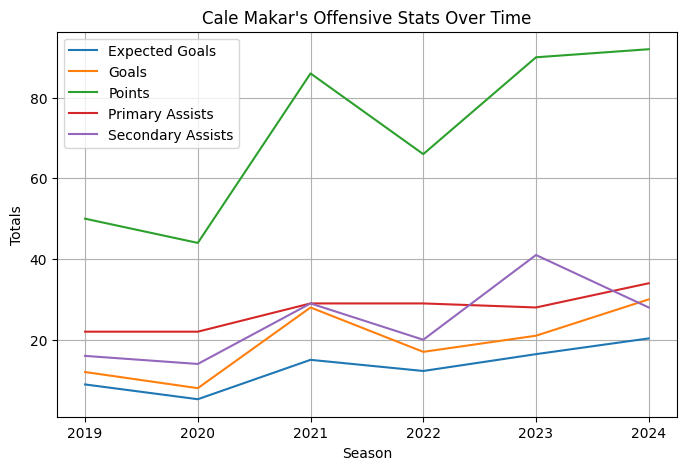

In [253]:
plt.figure(figsize=(8,5))
sns.lineplot(data=cm_df, x='season', y='I_F_xGoals', label="Expected Goals", errorbar=None)
sns.lineplot(data=cm_df, x='season', y='I_F_goals', label='Goals', errorbar=None)
sns.lineplot(data=cm_df, x='season', y='I_F_points', label='Points', errorbar=None)
sns.lineplot(data=cm_df, x='season', y='I_F_primaryAssists', label='Primary Assists', errorbar=None)
sns.lineplot(data=cm_df, x='season', y='I_F_secondaryAssists', label='Secondary Assists', errorbar=None)
plt.title("Cale Makar's Offensive Stats Over Time")
plt.xlabel("Season")
plt.ylabel("Totals")
plt.grid(True)
plt.show()

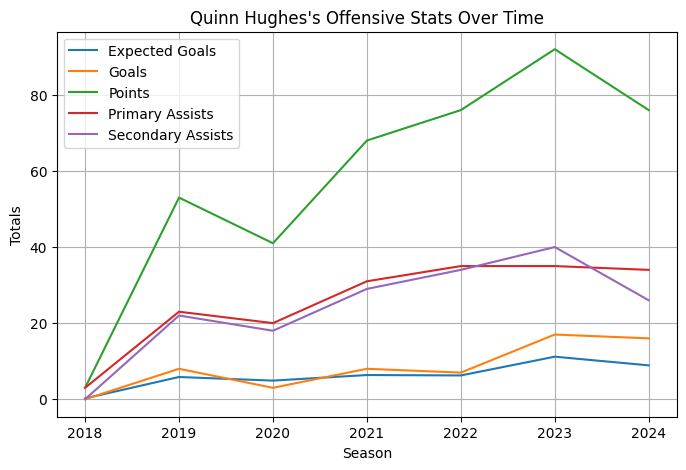

In [254]:
plt.figure(figsize=(8,5))
sns.lineplot(data=qh_df, x='season', y='I_F_xGoals', label="Expected Goals", errorbar=None)
sns.lineplot(data=qh_df, x='season', y='I_F_goals', label='Goals', errorbar=None)
sns.lineplot(data=qh_df, x='season', y='I_F_points', label='Points', errorbar=None)
sns.lineplot(data=qh_df, x='season', y='I_F_primaryAssists', label='Primary Assists', errorbar=None)
sns.lineplot(data=qh_df, x='season', y='I_F_secondaryAssists', label='Secondary Assists', errorbar=None)
plt.title("Quinn Hughes's Offensive Stats Over Time")
plt.xlabel("Season")
plt.ylabel("Totals")
plt.grid(True)
plt.show()

##### **What to look for:**

- Do each players stats trend upwards or are they flat/trending downwards over time?
- Do the stats vary a lot or are the numbers consistent over time?

<br>

---
### 2️⃣ **Mean, Median, Variance, and Standard Deviation of Points**

It looks like both players have ended up with around the same amount of points, but different values in goals vs assists. I'm going to be focusing on points for the remainder of this question as all other stats follow the same curve and all contribute equally to points.

Even though both players have earned roughly the same amount of points recently, have they consistently earned that amount of points over their careers?

In [312]:
mean = sum(cm_df['I_F_points']) / len(cm_df['season'])
median = cm_df['I_F_points'].median()
variance = cm_df['I_F_points'].var()
std_deviation = cm_df['I_F_points'].std()

cm_points_df = pd.DataFrame({
    'category': [
        'Mean Points',
        'Median Points',
        'Point Variance',
        'Std Dev Points'
    ],
    "value": [
        mean,
        median,
        variance,
        std_deviation
    ],
})

print(f"The mean for Cale Makar's points: {mean}")
print(f"The median for Cale Makar's points: {median}")
print(f"The variance in Cale Makar's points: {variance}")
print(f"The standard deviation in Cale Makar's points: {std_deviation}")

The mean for Cale Makar's points: 71.33333333333333
The median for Cale Makar's points: 76.0
The variance in Cale Makar's points: 444.2666666666666
The standard deviation in Cale Makar's points: 21.077634275854265


In [ ]:
mean = sum(qh_df['I_F_points']) / len(qh_df['season'])
median = qh_df['I_F_points'].median()
variance = qh_df['I_F_points'].var()
std_deviation = qh_df['I_F_points'].std()

qh_points_df = pd.DataFrame({
    'category': [
        'Mean Points',
        'Median Points',
        'Point Variance',
        'Std Dev Points'
    ],
    'value': [
        mean,
        median,
        variance,
        std_deviation
    ]
})

print(f"The mean for Quinn Hughes's points: {mean}")
print(f"The median for Quinn Hughes's points: {median}")
print(f"The variance in Quinn Hughes's points: {variance}")
print(f"The standard deviation in Quinn Hughes's points: {std_deviation}")

The mean for Quinn Hughes's points: 58.42857142857143
The median for Quinn Hughes's points: 68.0
The variance in Quinn Hughes's points: 873.6190476190477
The standard deviation in Quinn Hughes's points: 29.55704734270742


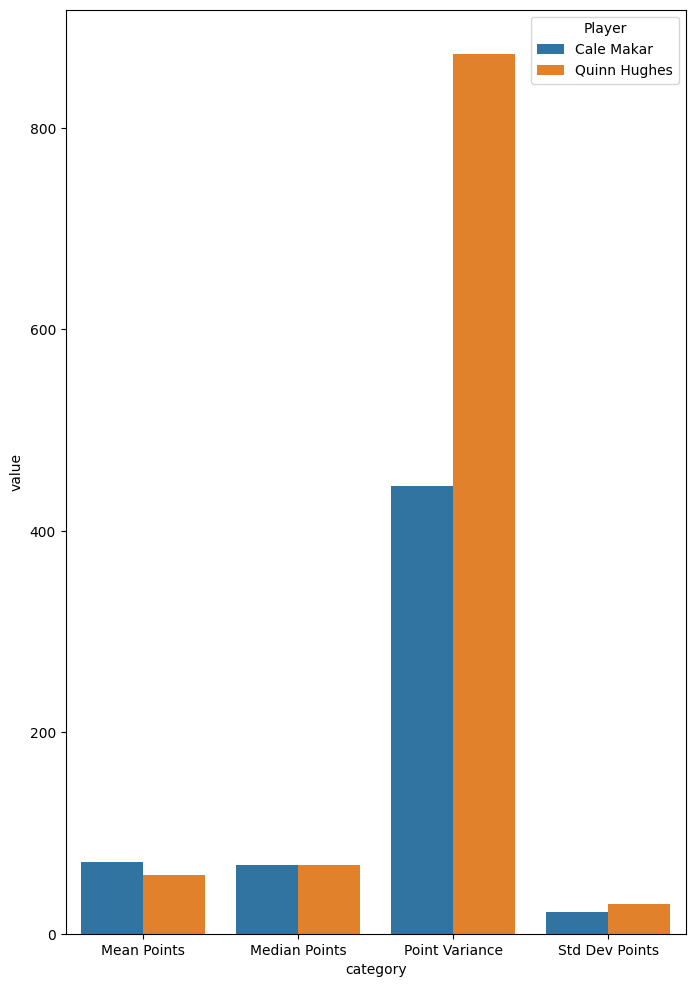

In [257]:

cm_points_df['Player'] = 'Cale Makar'
qh_points_df['Player'] = 'Quinn Hughes'
combined_points_df = pd.concat([cm_points_df, qh_points_df])

plt.figure(figsize=(8,12))
sns.barplot(data=combined_points_df, x='category', y='value', hue='Player')
plt.show()

### 3️⃣ **What This Tells Us**

Though both players got ~80 points in recent seasons, the **mean, variance, and standard deviation** are **very different**.

#### 📌 **What this means:**

##### 📈 **Cale Makar Stats:**

- Cale Makar's **mean points** are slightly higher than his **median points**. When combined with the line graph from above, means his high point seasons are slightly pulling the average up compared to his lower point seasons. Though the median is only above the mean by 3 points, showing that there is a good amount of consistency in his stats.
- The **standard deviation** in his points is also fairly low with the **variance** in this points being around **half as much** as Quinn Hughes.
- Cale Makar also consistently scores **higher** than his **expected goals** each season.

##### 📈 **Quinn Hughes Stats:**

- Quinn Hughes's **mean points** are below his **median points**. This can be attributed to his slow start in his career as shown on his line graph above, and shows some inconsistency with his performance.
- The **standard deviation** for Quinn Hughes's points is close to 50% higher than Cale Makar and the **variance** is almost double. This puts further emphasis on the start of his career where it took him a season before getting into the 40+ points range.

Though this doesn't tell the whole story.

🔍 There is information that this analysis doesn't account for, such as:
- **Games Played**: These stats are being compared as if both players played the same amount of games in each season
- **Ice Time**: These stats are also being compared as if both players got the same amount of ice time in games that they did play



---
## **Task 4 - Explore Q2: How do player stats compare to playtime?**

Now that we've got a baseline for how both players compare to each other, lets explore how they did with **games played and ice time** in the equation

---
### 1️⃣ **Scatter plots - Points vs Games Played/Ice time**

First, lets create another graph to show if playing more games and playing more in those games leads to more points in a season

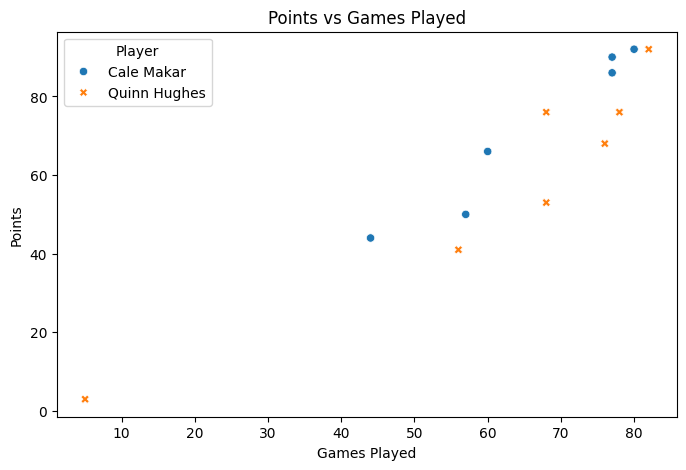

In [258]:
combined_df = pd.concat([cm_df, qh_df])

plt.figure(figsize=(8,5))
sns.scatterplot(data=combined_df, x='games_played', y='I_F_points', hue='name', style='name')
plt.title("Points vs Games Played")
plt.xlabel("Games Played")
plt.ylabel('Points')
plt.legend(title='Player')
plt.show()


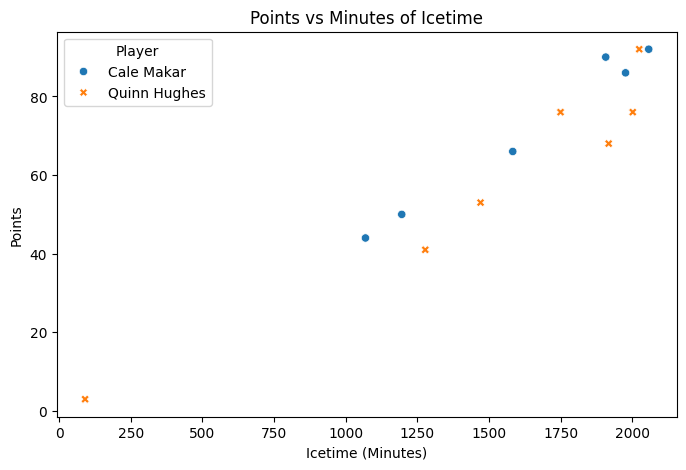

In [259]:
combined_df['Icetime_Minutes'] = combined_df['icetime'] / 60

plt.figure(figsize=(8,5))
sns.scatterplot(data=combined_df, x='Icetime_Minutes', y='I_F_points', hue='name', style='name')
plt.title("Points vs Minutes of Icetime")
plt.xlabel("Icetime (Minutes)")
plt.ylabel('Points')
plt.legend(title='Player')
plt.show()

In [318]:
cm_points_per_game = cm_df['I_F_points'].sum() / cm_df['games_played'].sum()
cm_points_per_minute = cm_df['I_F_points'].sum() / (cm_df['icetime'].sum() / 60)

qh_points_per_game = qh_df['I_F_points'].sum() / qh_df['games_played'].sum()
qh_points_per_minute = qh_df['I_F_points'].sum() / (qh_df['icetime'].sum() / 60)

print(f"Cale Makar's points per game: {cm_points_per_game:,.2f}")
print(f"Cale Makar's points per minute of play: {cm_points_per_minute:,.2f}")

print("------------------------------------------------------------------------------")

print(f"Quinn Hughes points per game: {qh_points_per_game:,.2f}")
print(f"Quinn Hughes points per minute of play: {qh_points_per_minute:,.2f}")


Cale Makar's points per game: 1.08
Cale Makar's points per minute of play: 0.04
------------------------------------------------------------------------------
Quinn Hughes points per game: 0.94
Quinn Hughes points per minute of play: 0.04


##### 💬 **What to look for**
- Is there a clear upward trend in the points?
- Does playing more games and playing more in those games lead to more points?

From looking at the scatter plots, **Quinn Hughes** needs to play more games and get ice time to earn the same amount of points as **Cale Makar**.

---
### 2️⃣ **Correlation between games played, ice time, and points**

Now let's calculate the correlation between playing more, and earning more points

Because the points are slightly different between games played and ice time, I'll calculate the correlation for both.

In [260]:
gp_correlation = combined_df['games_played'].corr(combined_df['I_F_points'])
ice_correlation = combined_df['icetime'].corr(combined_df['I_F_points'])

print(f"Correlation between games played and points: {gp_correlation:.2f}")
print(f"Correlation between ice time and points: {ice_correlation:.2f}")

Correlation between games played and points: 0.93
Correlation between ice time and points: 0.96


The correlation for games played is 0.93, and the correlation for ice time is 0.96, both of which are very strong. Players that play more, earn more points. 🤯

But is there a difference between either player?

In [261]:
cm_gp_correlation = cm_df['games_played'].corr(cm_df['I_F_points'])
cm_ice_correlation = cm_df['icetime'].corr(cm_df['I_F_points'])

print(f"Correlation between Cale Makar's games played and points: {cm_gp_correlation:.2f}")
print(f"Correlation between Cale Makar's ice time and points: {cm_ice_correlation:.2f}")

print("------------------------------------------------------------------------------")

qh_gp_correlation = qh_df['games_played'].corr(qh_df['I_F_points'])
qh_ice_correlation = qh_df['icetime'].corr(qh_df['I_F_points'])

print(f"Correlation between Quinn Hughes's games played and points: {qh_gp_correlation:.2f}")
print(f"Correlation between Quinn Hughes's ice time and points: {qh_ice_correlation:.2f}")

Correlation between Cale Makar's games played and points: 0.98
Correlation between Cale Makar's ice time and points: 0.99
------------------------------------------------------------------------------
Correlation between Quinn Hughes's games played and points: 0.94
Correlation between Quinn Hughes's ice time and points: 0.97


#### 3️⃣ **What this tells us**

The correlation between **games played** and **points** is **0.93**, and the correlation between **ice ime** and **points** is **0.96**. In other words, players that play more games are very likely to earn more points, and players that play more per game are slightly more likely to earn points.

Furthermore, both metrics for **Quinn Hughes** are **0.94** and **0.97**, while the same metrics for **Cale Makar** are **0.98** and **0.99**, which is almost perfectly linear. 

📌 **This means:**
- When both players play more games and get more ice time in the games they play, **they will earn more points**.
- Though all correlation metrics are very high, **Cale Makar** is shown to be **more consistent** in earning points when playing more. 

Though this analysis has still focused mostly on overall points between the 2 players. Maybe one player stands out in a certain area over the other or over the rest of the league?

---
## **Task 5 - Explore Q3: Do either of the players excel more in certain areas than the other/rest of the league?**

Having established how strongly games played and ice time relate to point production, we can now delve deeper into specific performance areas to see if one player excels in any one specific area.

---

### 1️⃣ **Create new dataframes and columns**

First, we'll create a new dataframe that includes all the data for defensemen in all situations, and add some percentile columns for the main offensive stats

In [ ]:
defense_df = player_df[(player_df['position'] == 'D') & (player_df['situation'] == 'all')].copy()

In [263]:

defense_df['Goals_Percentile'] = defense_df['I_F_goals'].rank(pct=True) * 100
defense_df['Points_Percentile'] = defense_df['I_F_points'].rank(pct=True) * 100
defense_df['Primary_Assists_Percentile'] = defense_df['I_F_primaryAssists'].rank(pct=True) * 100
defense_df['Secondary_Assists_Percentile'] = defense_df['I_F_secondaryAssists'].rank(pct=True) * 100

---

### 2️⃣ **Visualize how the 2 players compare to the rest of the league**

Next, we'll compare the median values of the two defensemen to the rest of the defensemen in the league to see if any of their stats consistently stand out.

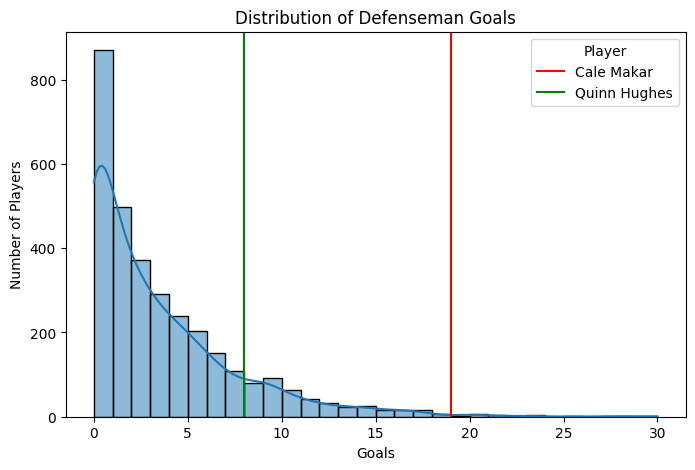

In [264]:
plt.figure(figsize=(8,5))
sns.histplot(defense_df['I_F_goals'], bins=30, kde=True)
plt.axvline(cm_df['I_F_goals'].median(), color='red', label='Cale Makar')
plt.axvline(qh_df['I_F_goals'].median(), color='green', label='Quinn Hughes')
plt.xlabel("Goals")
plt.ylabel('Number of Players')
plt.title('Distribution of Defenseman Goals')
plt.legend(title='Player')
plt.show()

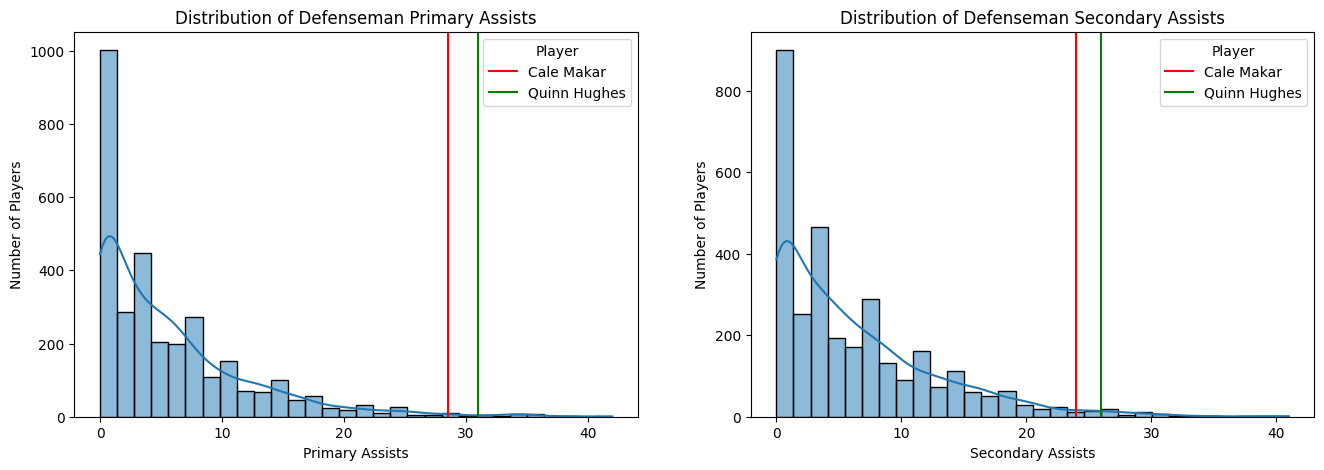

In [265]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
sns.histplot(defense_df['I_F_primaryAssists'], bins=30, kde=True)
plt.axvline(cm_df['I_F_primaryAssists'].median(), color='red', label='Cale Makar')
plt.axvline(qh_df['I_F_primaryAssists'].median(), color='green', label='Quinn Hughes')
plt.xlabel("Primary Assists")
plt.ylabel('Number of Players')
plt.legend(title='Player')
plt.title('Distribution of Defenseman Primary Assists')

plt.subplot(1, 2, 2)
sns.histplot(defense_df['I_F_secondaryAssists'], bins=30, kde=True)
plt.axvline(cm_df['I_F_secondaryAssists'].median(), color='red', label='Cale Makar')
plt.axvline(qh_df['I_F_secondaryAssists'].median(), color='green', label='Quinn Hughes')
plt.xlabel("Secondary Assists")
plt.ylabel('Number of Players')
plt.legend(title='Player')
plt.title('Distribution of Defenseman Secondary Assists')

plt.show()

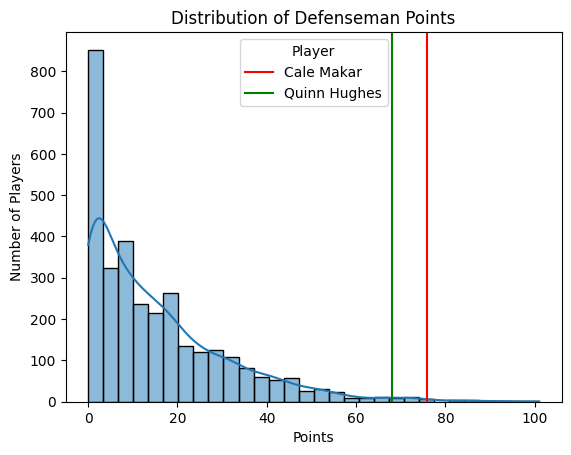

In [266]:
sns.histplot(defense_df['I_F_points'], bins=30, kde=True)
plt.axvline(cm_df['I_F_points'].median(), color='red', label='Cale Makar')
plt.axvline(qh_df['I_F_points'].median(), color='green', label='Quinn Hughes')
plt.xlabel("Points")
plt.ylabel('Number of Players')
plt.legend(title='Player')
plt.title('Distribution of Defenseman Points')
plt.show()

#### ✅ **What this tells us**

These histograms align with a lot of the information we've covered already, but it also showcases some new information

- **Cale Makar** median goal total is **roughly twice** as much as **Quinn Hughes**, most likely due to Hughes's start to his career
- **Quinn Hughes** is more likely to pass the puck instead of shooting or get assist off of rebounds/missed shots, while **Cale Makar** is the opposite.
- **Both defensemen** are capable of producing point totals that put them **at the top of the league**.

**We can also look at percentiles for where both defensemen fall in with the rest of the league**

---

### 3️⃣ **View percentiles for how players perform in the league**

Now that we have an idea for where both players fall in with the rest of the league, lets look at the percentiles for each player in each season to get a better idea of how their performance compares to the other defensemen

In [267]:
player_percentiles = defense_df.loc[defense_df['name'].isin(['Cale Makar', 'Quinn Hughes']), ['name', 'season', f'Goals_Percentile', 'Points_Percentile', 'Primary_Assists_Percentile', 'Secondary_Assists_Percentile']].reset_index(drop=True)

player_percentiles = player_percentiles.sort_values(by=['name', 'season']).reset_index(drop=True)



In [268]:

player_percentiles

,name,season,Goals_Percentile,Points_Percentile,Primary_Assists_Percentile,Secondary_Assists_Percentile
0,Cale Makar,2019,95.546431,95.988629,97.062539,90.729627
1,Cale Makar,2020,87.586860,93.840809,97.062539,87.239419
2,Cale Makar,2021,99.936829,99.842072,99.068225,99.273531
3,Cale Makar,2022,98.926090,98.610234,99.068225,95.720152
4,Cale Makar,2023,99.684144,99.873658,98.894504,100.000000
5,Cale Makar,2024,100.000000,99.921036,99.526216,99.052432
6,Quinn Hughes,2018,13.755527,25.078964,44.409349,9.491472
7,Quinn Hughes,2019,87.586860,96.983575,97.441567,97.030954
8,Quinn Hughes,2020,59.523057,92.293114,96.036008,93.682881
9,Quinn Hughes,2021,87.586860,98.862919,99.226153,99.273531


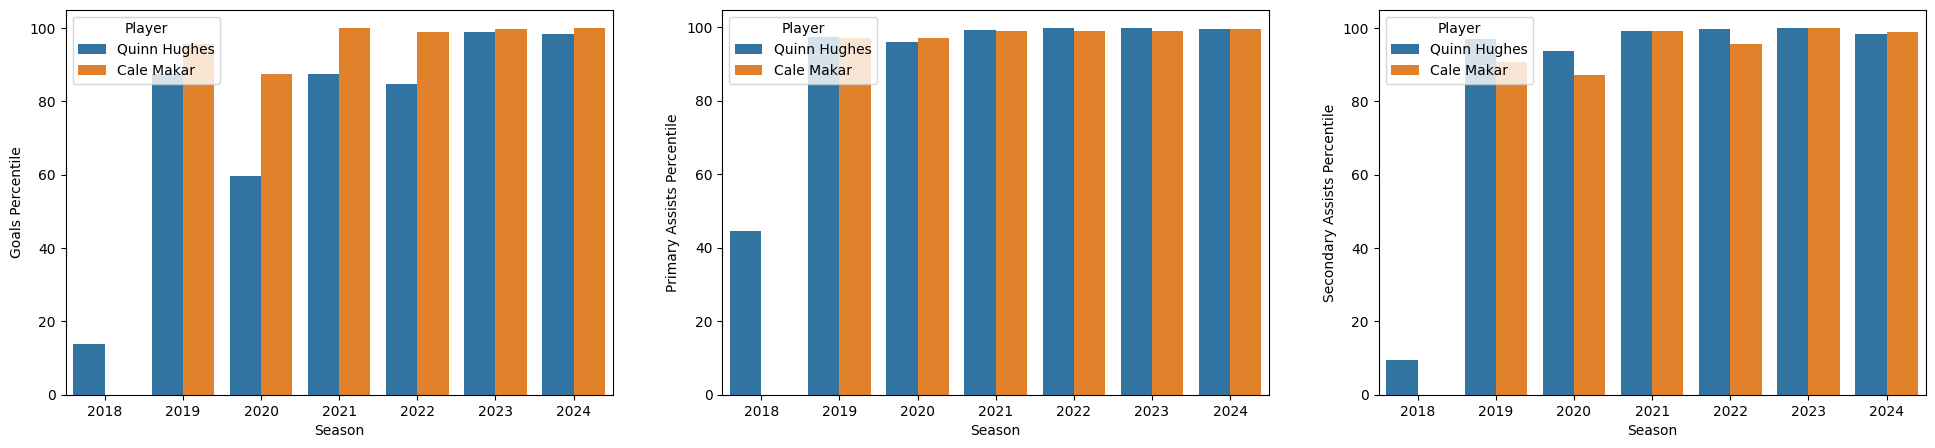

In [269]:

plt.figure(figsize=(24,5))

plt.subplot(1, 3, 1)
sns.barplot(data=player_percentiles, x='season', y='Goals_Percentile', hue='name')
plt.xlabel('Season')
plt.ylabel('Goals Percentile')
plt.title("Player Goal Scoring Percentile Rank")
plt.legend(title='Player')

plt.subplot(1, 3, 2)
sns.barplot(data=player_percentiles, x='season', y='Primary_Assists_Percentile', hue='name')
plt.xlabel('Season')
plt.ylabel('Primary Assists Percentile')
plt.title("Player Primary Assist Percentile Rank")
plt.legend(title='Player')

plt.subplot(1, 3, 3)
sns.barplot(data=player_percentiles, x='season', y='Secondary_Assists_Percentile', hue='name')
plt.xlabel('Season')
plt.ylabel('Secondary Assists Percentile')
plt.title("Player Secondary Assist Percentile Rank")
plt.legend(title='Player')
plt.show()

#### ✅ **What this tells us**

Looking at this data, we can also see the same trends emerge:
- **Cale Makar** places higher with scoring, being better than **98% or more of the league defensemen** in **4/6 seasons**.
- **Quinn Hughes** has slightly better stats with assists, placing in the **top 0.5%** for the past 3 seasons in **primary assists**, and in the **top 4%** the previous 2 seasons. **Secondary assists** are similar. Though, he struggles with goal scoring, only placing in the **top 10% once**.
- **Both defensemen** place in or close to the **top 5%** in points for the majority of their careers.

Interestingly enough, **Cale Makar** places very high in assists as well, despite consistently getting less of them than **Quinn Hughes**. He even got the most **secondary assists** in 2023, beating out **Quinn Hughes** who was in the top **0.04%**.

Some other interesting observations include:
- **Cale Makar** also scored the most goals of any defensemen in the league in 2024, and also put up numbers high enough to place him in the **top 1%** in every other category.
- Despite only placing in roughly the **top 20%** for scoring in 2019, 2021, and 2022, **Quinn Hughes** was still in the **top 5% for points**.
- **Quinn Hughes** was also in the **top 0.5%** for points in the last 3 seasons, just barely being beaten out by **Cale Makar**

📌 What this means:
- Both players are capable of playing at an elite level in hockey consistently.
- Both players have performed extremely well compared to the rest of the defensemen in the league for a majority of their careers.
- Both players have consistently earned some of the most points for defensemen in the league, while earning a majority of their points through different methods.

---
## **Task 6 - Explore Q4: How do the other offensive stats compare?**

Now that we've established that both players can perform consistently at the top level in hockey, lets take a look at some other stats that might contribute to the decision of who to trade for.

---

### 1️⃣ **Identify other stats to analyse alongside the other primary stats**

The additional stats we'll take a look at are:
- `Shot Attempts`
- `Shots on Goal`
- `Takeaways`
- `Low Danger Shots`
- `Medium Danger Shots`
- `High Danger Shots`
- `Low Danger Goals`
- `Medium Danger Goals`
- `High Danger Goals`

---

### 2️⃣ **Visualize relations between data**

The visuals I'll be creating are:
- `Shot Attempts vs Shots on Goal` → To see if one player is more accurate when shooting than the other.
- `Puck Takeaways between the two players` → To see how many turnovers this player creates and how well they regain control of the puck.
- `Low/Medium/High Danger Shots vs Low/Medium/High Danger Goals` → To see how well a player can convert a shot into a goal in all 3 scenarios
- `Expected Shots on Goal vs Actual Shots on Goal` → To see if a player underperforms, overperforms, or meets the goals expectations of them in a season.

---
### 1️⃣ **Shot Attempts vs Shots on Goal**

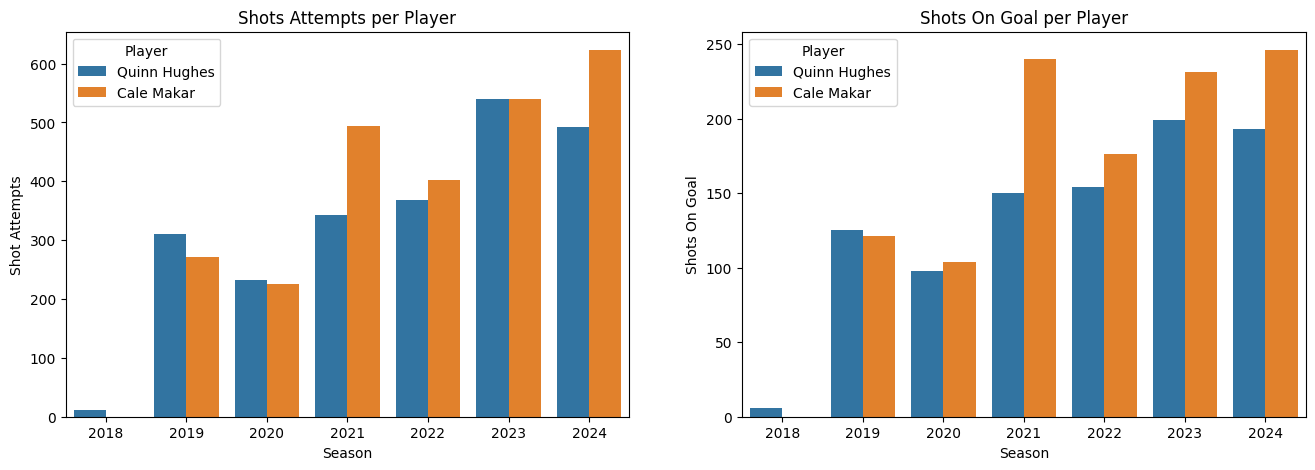

In [281]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
sns.barplot(combined_df, x='season', y='I_F_shotAttempts', hue='name')
plt.title('Shots Attempts per Player')
plt.xlabel('Season')
plt.ylabel('Shot Attempts')
plt.legend(title='Player')

plt.subplot(1, 2, 2)
sns.barplot(combined_df, x='season', y='I_F_shotsOnGoal', hue='name')
plt.title('Shots On Goal per Player')
plt.xlabel('Season')
plt.ylabel('Shots On Goal')
plt.legend(title='Player')
plt.show()

---

### 2️⃣ **Puck Takeaways per Player**

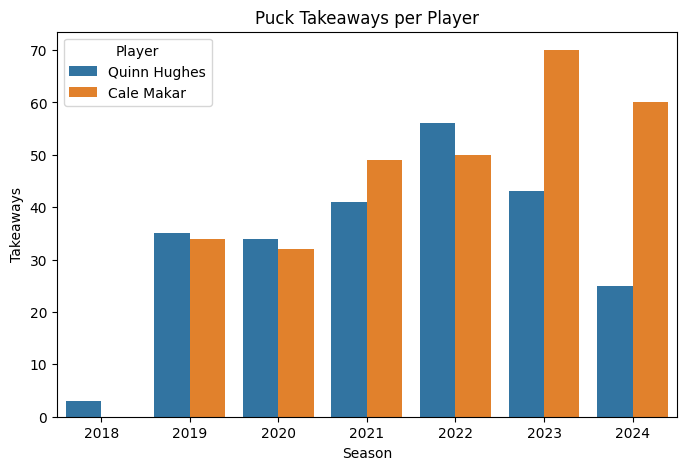

In [282]:
plt.figure(figsize=(8,5))
sns.barplot(combined_df, x='season', y='I_F_takeaways', hue='name')
plt.title('Puck Takeaways per Player')
plt.xlabel('Season')
plt.ylabel('Takeaways')
plt.legend(title='Player')
plt.show()

---

### 3️⃣ **Low/Medium/High Danger Shots vs Goals**

Text(0.5, 1.0, 'High Danger Shot Attempts vs Goals')

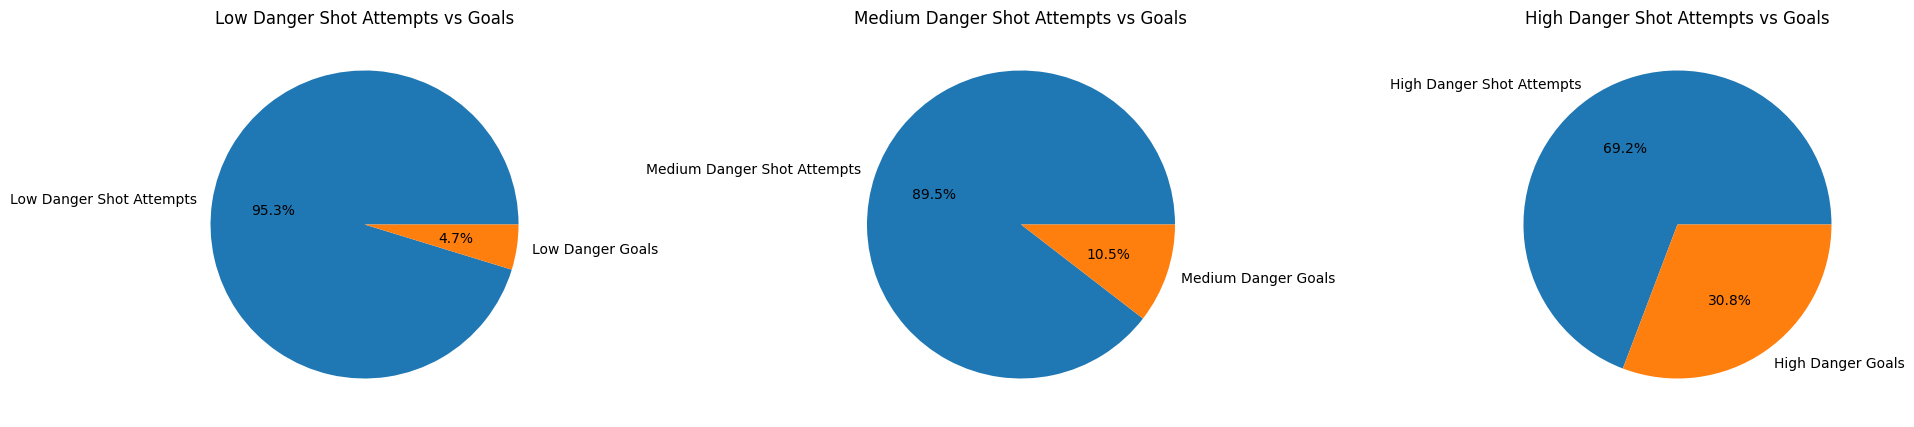

In [294]:
low_totals = cm_df[['I_F_lowDangerShots', 'I_F_lowDangerGoals']].sum()
low_chart_data = low_totals.values

medium_totals = cm_df[['I_F_mediumDangerShots', 'I_F_mediumDangerGoals']].sum()
medium_chart_data = medium_totals.values

high_totals = cm_df[['I_F_highDangerShots', 'I_F_highDangerGoals']].sum()
high_chart_data = high_totals.values

plt.figure(figsize=(24,5))

plt.subplot(1, 3, 1)
plt.pie(low_chart_data, labels=['Low Danger Shot Attempts', 'Low Danger Goals'], autopct='%1.1f%%')
plt.title('Cale Makar Low Danger Shot Attempts vs Goals')

plt.subplot(1, 3, 2)
plt.pie(medium_chart_data, labels=['Medium Danger Shot Attempts', 'Medium Danger Goals'], autopct='%1.1f%%')
plt.title('Cale Makar Medium Danger Shot Attempts vs Goals')

plt.subplot(1, 3, 3)
plt.pie(high_chart_data, labels=['High Danger Shot Attempts', 'High Danger Goals'], autopct='%1.1f%%')
plt.title('Cale Makar High Danger Shot Attempts vs Goals')

Text(0.5, 1.0, 'Quinn Hughes High Danger Shot Attempts vs Goals')

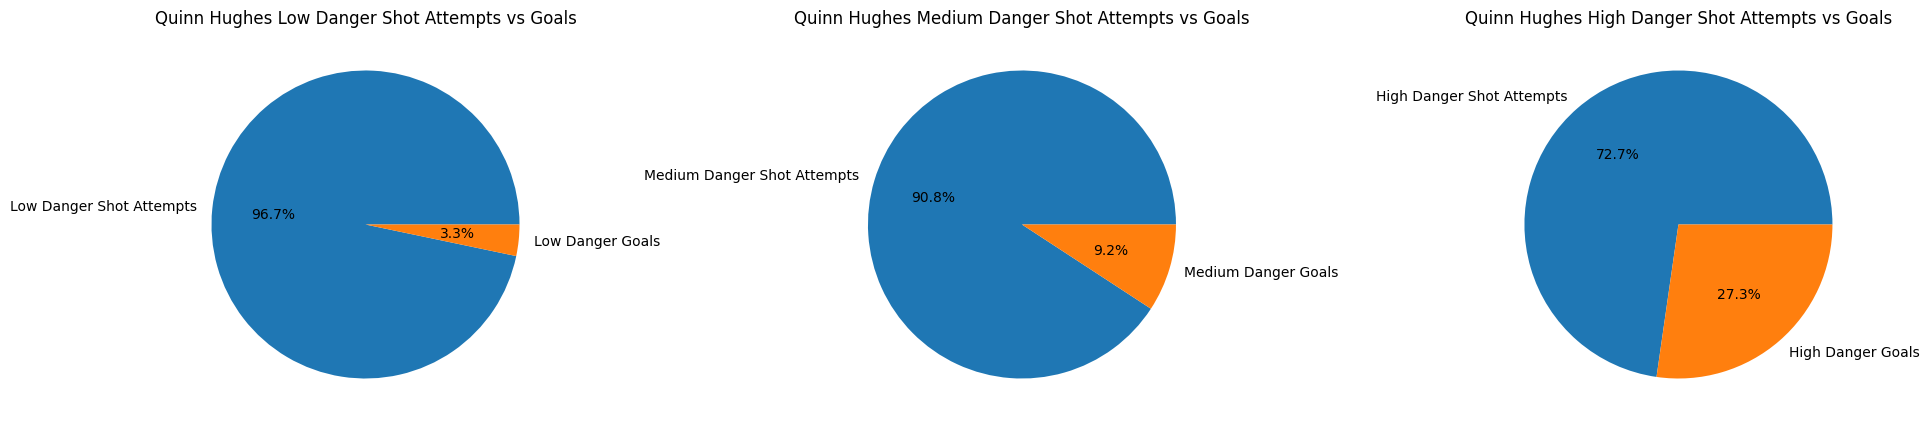

In [295]:
low_totals = qh_df[['I_F_lowDangerShots', 'I_F_lowDangerGoals']].sum()
low_chart_data = low_totals.values

medium_totals = qh_df[['I_F_mediumDangerShots', 'I_F_mediumDangerGoals']].sum()
medium_chart_data = medium_totals.values

high_totals = qh_df[['I_F_highDangerShots', 'I_F_highDangerGoals']].sum()
high_chart_data = high_totals.values

plt.figure(figsize=(24,5))

plt.subplot(1, 3, 1)
plt.pie(low_chart_data, labels=['Low Danger Shot Attempts', 'Low Danger Goals'], autopct='%1.1f%%')
plt.title('Quinn Hughes Low Danger Shot Attempts vs Goals')

plt.subplot(1, 3, 2)
plt.pie(medium_chart_data, labels=['Medium Danger Shot Attempts', 'Medium Danger Goals'], autopct='%1.1f%%')
plt.title('Quinn Hughes Medium Danger Shot Attempts vs Goals')

plt.subplot(1, 3, 3)
plt.pie(high_chart_data, labels=['High Danger Shot Attempts', 'High Danger Goals'], autopct='%1.1f%%')
plt.title('Quinn Hughes High Danger Shot Attempts vs Goals')

---

### 4️⃣ **Expected Goals vs Actual Goals for Each Player**

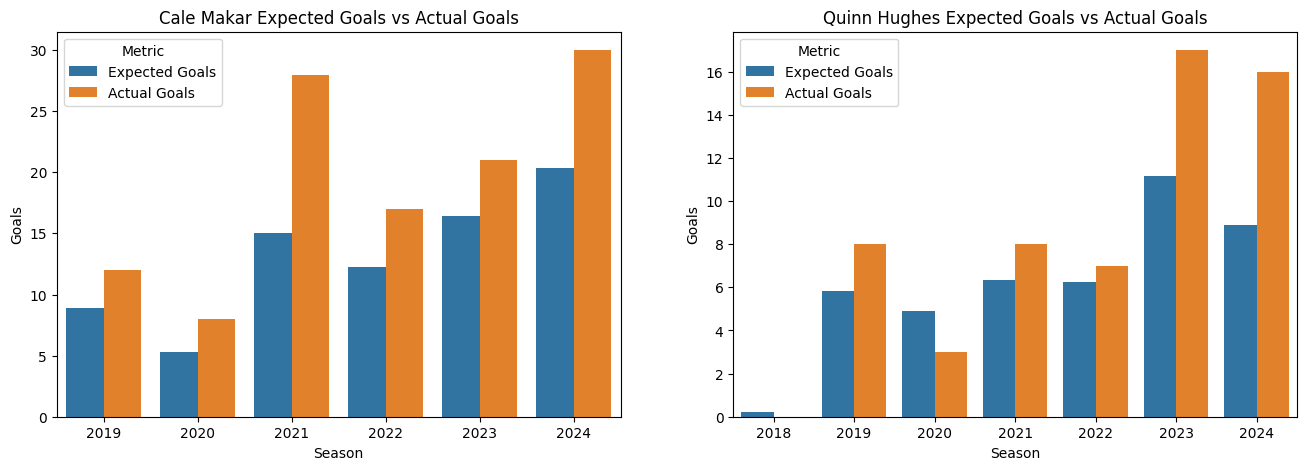

In [ ]:
cm_df_melted = cm_df.melt(id_vars=['season', 'name'], 
                       value_vars=['I_F_xGoals', 'I_F_goals'],
                       var_name='Metric',
                       value_name='Value')

cm_df_melted['Metric'] = cm_df_melted['Metric'].replace({
    'I_F_xGoals': 'Expected Goals',
    'I_F_goals': 'Actual Goals'
})

qh_df_melted = qh_df.melt(id_vars=['season', 'name'], 
                       value_vars=['I_F_xGoals', 'I_F_goals'],
                       var_name='Metric',
                       value_name='Value')

qh_df_melted['Metric'] = qh_df_melted['Metric'].replace({
    'I_F_xGoals': 'Expected Goals',
    'I_F_goals': 'Actual Goals'
})

plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
sns.barplot(data=cm_df_melted, x='season', y='Value', hue='Metric')
plt.title('Cale Makar Expected Goals vs Actual Goals')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend(title='Metric')

plt.subplot(1, 2, 2)
sns.barplot(data=qh_df_melted, x='season', y='Value', hue='Metric')
plt.title('Quinn Hughes Expected Goals vs Actual Goals')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.legend(title='Metric')

plt.show()

#### ✅ **What This Tells Us**

These visuals more or less reaffirm what the rest of the notebook has shown:

- Both defensemen have top tier offensive stats, especially as of recent
- **Cale Makar** performs ever so slightly better than **Quinn Hughes** when it comes to most of these statistics.
- Both players have outperformed their **expected goals** for most of their careers, but **Cale Makar's actual goals** are around **double** that of **Quinn Hughes**

---
## 🎯 **Conclusion**

Both defensemen perform well offensively but my pick for the trade would be **Cale Makar** for the following reasons:

- His numbers consistently beat **Quinn Hughes** in nearly every metric. If they don't then they are very close, as seen with **Cale Makars** assists.
- **Cale Makar** has proven to be a more consistent player since his debut in the league in 2019
- His shooting skills are better across the board as seen in the low/medium/high danger shots vs goals numbers and expected goals vs actual goals, where he consistently scores above expected, and not by small margins either.
- **Cale Makar** has also managed these stats while playing less game than **Quinn Hughes**, managing **1.08 points per game** vs **0.94 for Quinn Hughes**.